In [1]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [67]:
df=pd.read_csv('Churn_Modelling.csv', ',')
print(df.shape)
df


(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [68]:
df1=df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

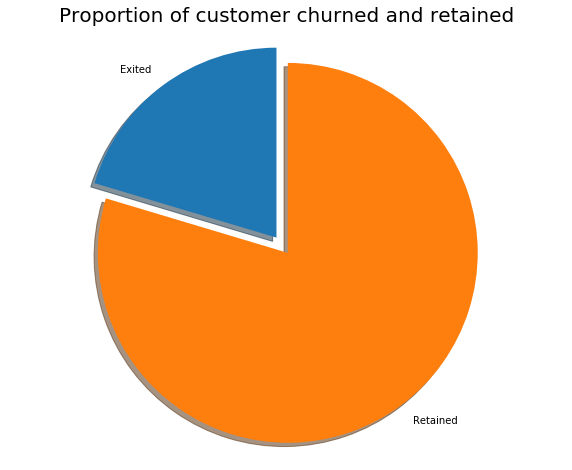

In [30]:
labels = 'Exited', 'Retained'
sizes= [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode=(0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Proportion of customer churned and retained', size = 20)
plt.show()


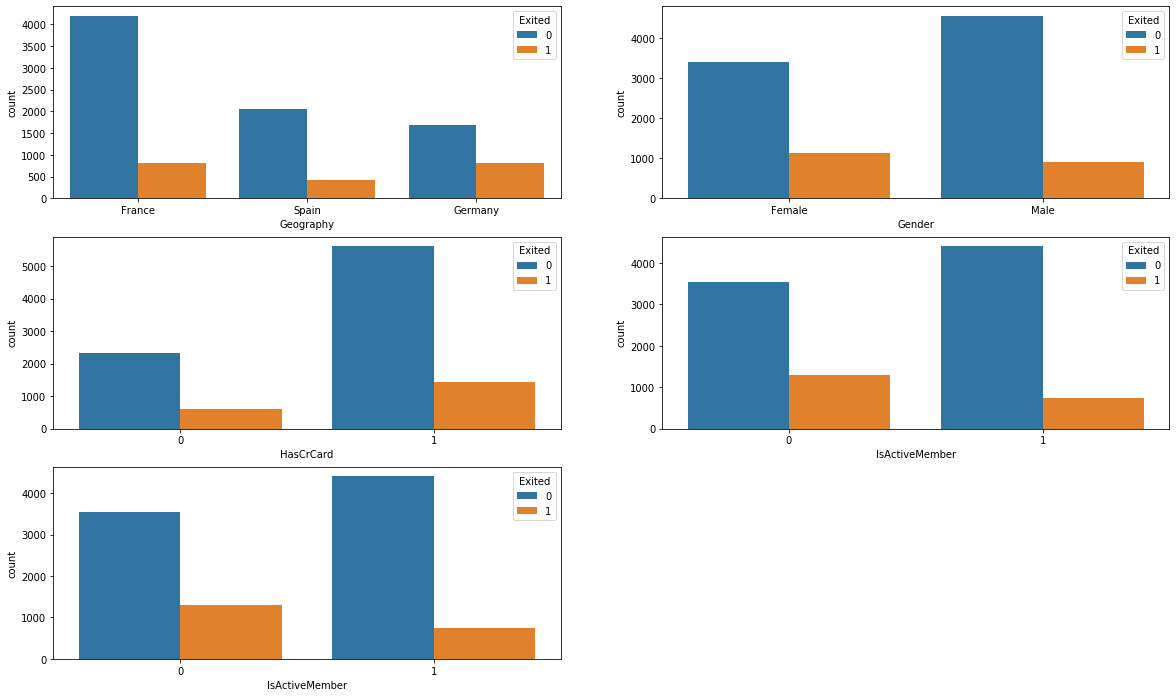

In [57]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[2][0])
fig.delaxes(axarr[2,1])


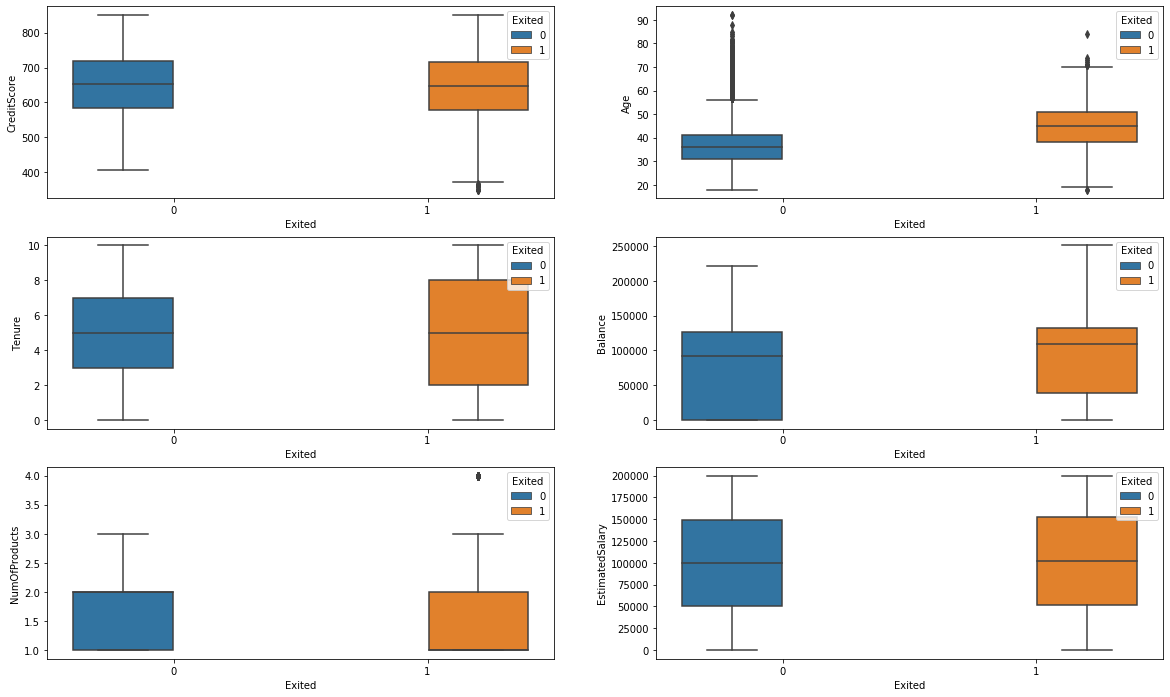

In [58]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

In [75]:
'''For the one hot variables, we change 0 to -1 so that the models can capture a negative relation 
where the attribute in inapplicable instead of 0'''
df1.loc[df1.HasCrCard == 0, 'HasCrCard'] = -1
df1.loc[df1.IsActiveMember == 0, 'IsActiveMember'] = -1
df1=df1.rename(columns={'Gender':'Gender_Male'})
df1.loc[df1.Gender_Male == 'Female', 'Gender_Male'] = -1
df1.loc[df1.Gender_Male == 'Male', 'Gender_Male'] = 1
df1.head()

,CreditScore,Gender_Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain,Geography_Germany
0,619,-1,42,2,0.00,1,1,1,101348.88,1,1,-1,-1
1,608,-1,41,1,83807.86,1,-1,1,112542.58,0,-1,1,-1
2,502,-1,42,8,159660.80,3,1,-1,113931.57,1,1,-1,-1
3,699,-1,39,1,0.00,2,-1,-1,93826.63,0,1,-1,-1
4,850,-1,43,2,125510.82,1,1,1,79084.10,0,-1,1,-1


In [70]:
# One hot encode the categorical variables
lst = ['Geography']
remove = list()
for i in lst:
    if (df1[i].dtype == np.str or df1[i].dtype == np.object):
        for j in df1[i].unique():
            df1[i+'_'+j] = np.where(df1[i] == j,1,-1)
        remove.append(i)
df1 = df1.drop(remove, axis=1)
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain,Geography_Germany
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,-1,-1
1,608,Female,41,1,83807.86,1,-1,1,112542.58,0,-1,1,-1
2,502,Female,42,8,159660.80,3,1,-1,113931.57,1,1,-1,-1
3,699,Female,39,1,0.00,2,-1,-1,93826.63,0,1,-1,-1
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,-1,1,-1


In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']]=scaler.fit_transform(df1[['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']])


In [85]:
df1.head()

,CreditScore,Gender_Male,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain,Geography_Germany
0,0.538,-1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,-1,-1
1,0.516,-1,0.310811,0.1,0.334031,0.000000,-1,1,0.562709,0,-1,1,-1
2,0.304,-1,0.324324,0.8,0.636357,0.666667,1,-1,0.569654,1,1,-1,-1
3,0.698,-1,0.283784,0.1,0.000000,0.333333,-1,-1,0.469120,0,1,-1,-1
4,1.000,-1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,-1,1,-1


In [86]:
df_train = df1.sample(frac=0.8,random_state=200)
df_test = df1.drop(df_train.index)

In [96]:
from sklearn.ensemble import RandomForestClassifier
X = df_train.loc[:, df_train.columns != 'Exited']
Y= df_train.Exited
model = RandomForestClassifier(n_estimators=200)
model.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
from sklearn.model_selection import cross_val_predict, GridSearchCV
parameters = {  'n_estimators':[ 100, 200, 500]}
clf = GridSearchCV(model, parameters, cv=10)
clf.fit(X,Y)
clf.best_params_

{'n_estimators': 200}

In [97]:
from sklearn.metrics import accuracy_score
X_test=df_test.loc[:, df_train.columns != 'Exited']
y_test=df_test.Exited
y_pred=model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.858


In [98]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import f1_score

acc=accuracy_score(y_test, y_pred)
recall=recall_score(y_test, y_pred, average='macro') 
prec=precision_score(y_test, y_pred, average='macro')
f1=f1_score(y_test, y_pred, average='macro')

In [99]:
print(acc) 
print( recall)
print(prec)
print( f1)

0.858
0.7097308488612837
0.7930116857572602
0.738501429034444
